In [6]:
%matplotlib inline

import sqlite3
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import urllib
import scipy.optimize
import random
from collections import defaultdict

def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)

In [7]:
print "Reading data..."
review = list(parseData("yelp_academic_dataset_review.json"))
print "done"

Reading data...
done


In [8]:
review[0]

{'business_id': '2aFiy99vNLklCx3T_tGS9A',
 'cool': 0,
 'date': '2011-10-10',
 'funny': 0,
 'review_id': 'NxL8SIC5yqOdnlXCg18IBg',
 'stars': 5,
 'text': "If you enjoy service by someone who is as competent as he is personable, I would recommend Corey Kaplan highly. The time he has spent here has been very productive and working with him educational and enjoyable. I hope not to need him again (though this is highly unlikely) but knowing he is there if I do is very nice. By the way, I'm not from El Centro, CA. but Scottsdale, AZ.",
 'type': 'review',
 'useful': 0,
 'user_id': 'KpkOkG6RIf4Ra25Lhhxf1A'}

In [9]:
text = []
for d in review:
    text.append(d['text'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

text_clean = []
for r in text:
    text_clean.append(cleanup(r))


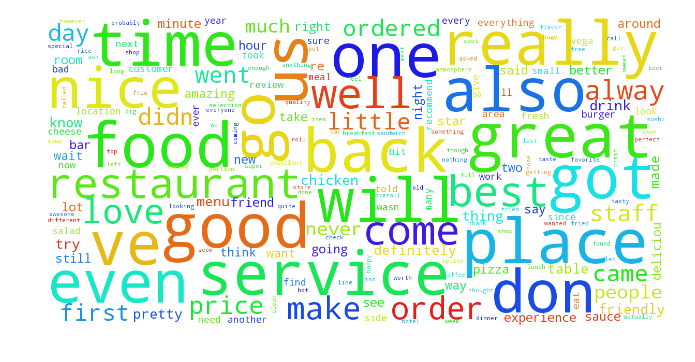

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(text_clean)